## Importing The Dependencies





In [1]:
import numpy as np
import pandas as pd
import re                                                      # Tools for performing (Regular Expression) matching and manipulation of strings
from nltk.corpus import stopwords                              # Filter out in (Natural Language Processing Tasks)
from nltk.stem.porter import PorterStemmer                     # It is used for stemming words reducing them to their root forms
from sklearn.feature_extraction.text import TfidfVectorizer    # Converts text data into a matrix of TF-IDF features
from sklearn.model_selection import train_test_split           # Spliting the data into numerical data
from sklearn.linear_model import LogisticRegression            # Training with the data
from sklearn.metrics import accuracy_score                     # Calculate accuracy and performance of our machine learning model


## Download the stop words

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

## Printing the stopwords in Enlish

In [3]:
print(stopwords.words('english'))             # Stopwords doesn't provide any meaning to a words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

## Load the Data




In [4]:
twitter_data =pd.read_csv("C:/Users/ANANDHU/OneDrive/Desktop/Documents/BIA Projects conntents/Twitter_Data.csv")
twitter_data.head(5)

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


## Remove textID

In [5]:
twitter_data = twitter_data.drop('textID', axis=1)
twitter_data.head(5)

,text,selected_text,sentiment
0,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,my boss is bullying me...,bullying me,negative
3,what interview! leave me alone,leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


## Checking the number of rows and colums

In [6]:
twitter_data.shape

(27481, 3)

## Checking for missing values

In [7]:
twitter_data.isnull().sum()

text             1
selected_text    1
sentiment        0
dtype: int64

## Filling the missing value

In [8]:
twitter_data['text'] = twitter_data['text'].fillna('Not Available')
twitter_data['selected_text'] = twitter_data['selected_text'].fillna(twitter_data['text'])

## Cheching missing value is removed

In [9]:
twitter_data.isnull().sum()

text             0
selected_text    0
sentiment        0
dtype: int64

## Checking the attributes of sentiment column

In [10]:
twitter_data['sentiment'].value_counts()

sentiment
neutral     11118
positive     8582
negative     7781
Name: count, dtype: int64

## Convert the (negative,positive,neutral) to (0,1,-1)

In [11]:
twitter_data['sentiment'] = twitter_data['sentiment'].map({ 'negative': -1, 'positive': 1,'neutral':0})

## Checking if it is convertered or not

In [12]:
twitter_data.head(7)

,text,selected_text,sentiment
0,"I`d have responded, if I were going","I`d have responded, if I were going",0
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,-1
2,my boss is bullying me...,bullying me,-1
3,what interview! leave me alone,leave me alone,-1
4,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",-1
5,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,0
6,2am feedings for the baby are fun when he is a...,fun,1


## Distribution of Sentiments

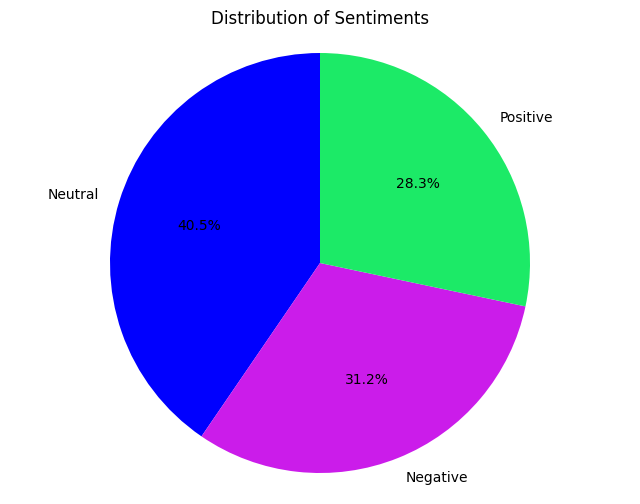

In [13]:
import matplotlib.pyplot as plt

sentiment_counts = twitter_data['sentiment'].value_counts()
labels = ['Neutral', 'Negative', 'Positive']
sizes = sentiment_counts.values
colors = ['#0000FF', '#cb1cea', '#1cea67']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Sentiments')
_ = plt.axis('equal')

## Amount of Sentiments

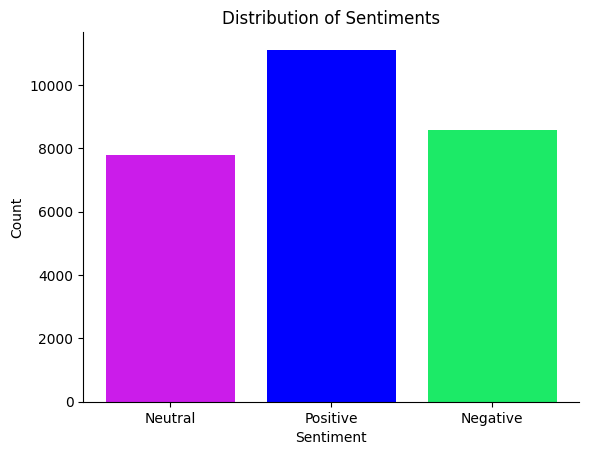

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'twitter_data' is your DataFrame with 'sentiment' column

# Define colors for each sentiment
colors = { '0': '#0000FF', '1': '#1cea67', '-1': '#cb1cea'}

# Get unique sentiments and their counts
sentiments, counts = np.unique(twitter_data['sentiment'], return_counts=True)

# Create the histogram
plt.bar(sentiments, counts, color=[colors[str(s)] for s in sentiments])

# Customize the plot
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(sentiments, ['Neutral', 'Positive', 'Negative' ])  # Set x-axis labels

plt.gca().spines[['top', 'right']].set_visible(False)

plt.show()


In [15]:
import re
import string
def clean_text(text):
    # Remove special characters like '*'
    text = re.sub(r'\*+', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Normalize whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    # Convert to lowercase
    text = text.lower()
    return text

# Apply the cleaning function to both 'text' and 'selected_text' columns
twitter_data['text'] = twitter_data['text'].apply(clean_text)
twitter_data['selected_text'] = twitter_data['selected_text'].apply(clean_text)

# Display the cleaned DataFrame
print(twitter_data)

                                                    text  \
0                      id have responded if i were going   
1             sooo sad i will miss you here in san diego   
2                                 my boss is bullying me   
3                          what interview leave me alone   
4      sons of why couldnt they put them on the relea...   
...                                                  ...   
27476  wish we could come see u on denver husband los...   
27477  ive wondered about rake to the client has made...   
27478  yay good for both of you enjoy the break you p...   
27479                                but it was worth it   
27480  all this flirting going on the atg smiles yay ...   

                                           selected_text  sentiment  
0                      id have responded if i were going          0  
1                                               sooo sad         -1  
2                                            bullying me         -1  

In [16]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [18]:
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('punkt_tab') # Download the punkt_tab data package
from nltk.stem import PorterStemmer

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt_tab: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [19]:
tokenized_data=twitter_data['selected_text'].apply(lambda x: x.split())
print(tokenized_data)

0                [id, have, responded, if, i, were, going]
1                                              [sooo, sad]
2                                           [bullying, me]
3                                       [leave, me, alone]
4                                               [sons, of]
                               ...                        
27476                                            [d, lost]
27477                                        [dont, force]
27478                      [yay, good, for, both, of, you]
27479                            [but, it, was, worth, it]
27480    [all, this, flirting, going, on, the, atg, smi...
Name: selected_text, Length: 27481, dtype: object


In [20]:
import nltk
nltk.download('wordnet')

[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [21]:
from nltk.stem import WordNetLemmatizer

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization to the tokenized data
tokenized_data = tokenized_data.apply(lambda x: [lemmatizer.lemmatize(i) for i in x])

# Print the lemmatized data
print(tokenized_data)


0                [id, have, responded, if, i, were, going]
1                                              [sooo, sad]
2                                           [bullying, me]
3                                       [leave, me, alone]
4                                                [son, of]
                               ...                        
27476                                            [d, lost]
27477                                        [dont, force]
27478                      [yay, good, for, both, of, you]
27479                             [but, it, wa, worth, it]
27480    [all, this, flirting, going, on, the, atg, smi...
Name: selected_text, Length: 27481, dtype: object


In [22]:
for i in range(len(tokenized_data)):
  tokenized_data[i]=' '.join(tokenized_data[i])
print(tokenized_data)

0                       id have responded if i were going
1                                                sooo sad
2                                             bullying me
3                                          leave me alone
4                                                  son of
                               ...                       
27476                                              d lost
27477                                          dont force
27478                            yay good for both of you
27479                                  but it wa worth it
27480    all this flirting going on the atg smile yay hug
Name: selected_text, Length: 27481, dtype: object


In [23]:
twitter_data['selected_text']=tokenized_data
print(twitter_data)

                                                    text  \
0                      id have responded if i were going   
1             sooo sad i will miss you here in san diego   
2                                 my boss is bullying me   
3                          what interview leave me alone   
4      sons of why couldnt they put them on the relea...   
...                                                  ...   
27476  wish we could come see u on denver husband los...   
27477  ive wondered about rake to the client has made...   
27478  yay good for both of you enjoy the break you p...   
27479                                but it was worth it   
27480  all this flirting going on the atg smiles yay ...   

                                          selected_text  sentiment  
0                     id have responded if i were going          0  
1                                              sooo sad         -1  
2                                           bullying me         -1  
3  

In [24]:
all_words=' '.join([text for text in twitter_data['selected_text']])

print(all_words)

id have responded if i were going sooo sad bullying me leave me alone son of httpwwwdothebouncycomsmf some shameless plugging for the best ranger forum on earth fun soooo high both of you wow u just became cooler a much a i love to be hopeful i reckon the chance are minimal p im never gonna get my cake and stuff like dangerously lost test test from the lg env2 uh oh i am sunburned sigh sick onna he just not that into you oh marly im so sorry i hope you find her soon 3 3 interesting is cleaning the house for her family who is comming later today gotta restart my computer i thought win7 wa supposed to put an end to the constant rebootiness see wat i mean bout foll0w friidays it called lose f0llowers friday smh the free fillin app on my ipod is fun im addicted im sorry no internet fun power back up not working too quiteheavenly hope well so much for being unhappy for about 10 minute funny ahhh i slept through the game im gonna try my best to watch tomorrow though i hope we play army thats

In [25]:
neutral_words=' '.join([text for text in twitter_data['selected_text'][twitter_data['sentiment']==0]])
print(neutral_words)
print(len(neutral_words))


id have responded if i were going httpwwwdothebouncycomsmf some shameless plugging for the best ranger forum on earth soooo high both of you a much a i love to be hopeful i reckon the chance are minimal p im never gonna get my cake and stuff test test from the lg env2 he just not that into you oh marly im so sorry i hope you find her soon 3 3 is cleaning the house for her family who is comming later today gotta restart my computer i thought win7 wa supposed to put an end to the constant rebootiness see wat i mean bout foll0w friidays it called lose f0llowers friday smh ahhh i slept through the game im gonna try my best to watch tomorrow though i hope we play army thats it it the end tear for fear just in case you wonder we are really busy today and this coming with with adding ton of new blog and update stay tuned car not happy big big dent in boot hoping theyre not going to write it off crossing finger and waiting mayday ratt rocked nashville toniteone thing sucked no encore like in t

In [26]:
negative_words=' '.join([text for text in twitter_data['selected_text'][twitter_data['sentiment']==-1]])
print(negative_words)
print(len(negative_words))

sooo sad bullying me leave me alone son of dangerously lost uh oh i am sunburned sigh sick onna im sorry no internet power back up not working too well so much for being unhappy for about 10 minute miss soooooo sleeeeepy suckkkkkk dont like go d im not thrilled at all with mine it is u have dissappointed me that past few day hurt torn ace of heart i lost all my friend im alone and sleepy i give in to easily jealous baddd i am sooo tired sick sorry guy i miss you bby tired freaked unfortunately horrible busy i dont feel confident sad not looking forward poor you not well painful sad missed all the awesome weather terrible unfortunatley that suck tho hate fighting carwarmed sprite taste like sore throat hate i dont like the other one bugger forgot i still have washing in my machine really bad brutal boring messed not the secret namerebecca please miss illness sad sick oww what about me i vote every day for you this diet is killing me bored lost my voice hate i am such a creeper i feel di

In [27]:
positive_words=' '.join([text for text in twitter_data['selected_text'][twitter_data['sentiment']==1]])
print(positive_words)
print(len(positive_words))

fun wow u just became cooler like interesting the free fillin app on my ipod is fun im addicted fun quiteheavenly hope funny a little happy fo avid fan of i love to romance zero is funny favorite s awesome chilliin better thank yyyyyyyyyoooooooooouuuuu lucky happy star war day everyone and enjoy the holiday uk cool love it there happy mother day to all you mum out there best pretty awesome thanks safe i wish i wa allowed to go thank you i love my hahaa your awesomee awesomeeeee not a prob y adore good i love him too e nice i wish enjoyable endearing goooooddd morning tweet fine sending love blessing healing thought to you family peace p sound like fun great excited good morning it the best show ever i totally loved it i 3 you u helped me thru the hrdest time of my life happy 1 year 3 goooooooooooood morrrrrrrrning e fun happy going to have fun d thank you hahaha crush feeling smooth jonas brother live to party it rocking so hard happy would love to test it though fun night i thought wo

In [28]:
x =twitter_data['selected_text']
y =twitter_data["sentiment"]
print(x)
print(y)

0                       id have responded if i were going
1                                                sooo sad
2                                             bullying me
3                                          leave me alone
4                                                  son of
                               ...                       
27476                                              d lost
27477                                          dont force
27478                            yay good for both of you
27479                                  but it wa worth it
27480    all this flirting going on the atg smile yay hug
Name: selected_text, Length: 27481, dtype: object
0        0
1       -1
2       -1
3       -1
4       -1
        ..
27476   -1
27477   -1
27478    1
27479    1
27480    0
Name: sentiment, Length: 27481, dtype: int64


In [29]:
x.shape
y.shape

(27481,)

In [30]:
max_length=len(x)
print(max_length)

27481


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_vec = vectorizer.fit_transform(x)

In [32]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_balanced, y_balanced = smote.fit_resample(X_vec, y)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler # Import MinMaxScaler

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x_balanced, y_balanced, test_size=0.2, random_state=42)

# Step 2: Apply Min-Max Scaling

scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and test sets
X_train_scaled = scaler.fit_transform(x_train.toarray())  # Convert sparse matrix to dense array
X_test_scaled = scaler.transform(x_test.toarray())

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report # Import accuracy_score and classification_report

In [36]:
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)

# Step 4: Make predictions on the test set
y_pred = logreg.predict(X_test_scaled)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)

Accuracy: 0.8496477289761655

Classification Report:
               precision    recall  f1-score   support

          -1       0.83      0.87      0.85      2251
           0       0.81      0.82      0.82      2173
           1       0.91      0.86      0.89      2247

    accuracy                           0.85      6671
   macro avg       0.85      0.85      0.85      6671
weighted avg       0.85      0.85      0.85      6671



In [37]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

param_dist = {
    'C': uniform(0.01, 10),  # Example: Uniform distribution for 'C' hyperparameter
    'penalty': ['l1', 'l2']  # Example: Choices for 'penalty' hyperparameter
}


In [38]:
random_search = RandomizedSearchCV(estimator=logreg, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', random_state=42, n_jobs=-1, verbose=1)
random_search.fit(x_train, y_train)

# Get the best parameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Hyperparameters (Randomized Search):", best_params)

# Evaluate the best model
y_pred = best_model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 50 candidates, totalling 250 fits


c:\Users\ANANDHU\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
90 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ANANDHU\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ANANDHU\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ANANDHU\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    s

Best Hyperparameters (Randomized Search): {'C': 3.961502360018144, 'penalty': 'l2'}
Accuracy: 0.8453005546394843

Classification Report:
               precision    recall  f1-score   support

          -1       0.87      0.81      0.84      2251
           0       0.76      0.87      0.82      2173
           1       0.92      0.85      0.88      2247

    accuracy                           0.85      6671
   macro avg       0.85      0.85      0.85      6671
weighted avg       0.85      0.85      0.85      6671



In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 3: Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # Default is 100 trees
rf_classifier.fit(X_train_scaled, y_train)

# Step 4: Make predictions on the test set
y_pred = rf_classifier.predict(X_test_scaled)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)

Accuracy: 0.8463498725828211

Classification Report:
               precision    recall  f1-score   support

          -1       0.84      0.84      0.84      2251
           0       0.78      0.88      0.83      2173
           1       0.95      0.82      0.88      2247

    accuracy                           0.85      6671
   macro avg       0.85      0.85      0.85      6671
weighted avg       0.85      0.85      0.85      6671



In [40]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [41]:
encoder = LabelEncoder()
y_train_encoded = to_categorical(encoder.fit_transform(y_train))
y_test_encoded = to_categorical(encoder.transform(y_test))

In [42]:
# Reshape the input data to 3D for LSTM (samples, timesteps, features)
X_train_lstm = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_lstm = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

In [43]:
# Step 2: Build the LSTM Model
model = Sequential()
model.add(LSTM(128, input_shape=(1, X_train_scaled.shape[1]), return_sequences=False))
model.add(Dropout(0.2))  # Prevent overfitting
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(y_train_encoded.shape[1], activation='softmax'))  # Output layer

c:\Users\ANANDHU\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [47]:
# Step 3: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model

<Sequential name=sequential, built=True>

In [ ]:
# Step 4: Train the model
history = model.fit(
    X_train_lstm,
    y_train_encoded,
    validation_data=(X_test_lstm, y_test_encoded),
    epochs=5,
    batch_size=32,
    verbose=1
)

Epoch 1/5
834/834 ━━━━━━━━━━━━━━━━━━━━ 90s 102ms/step - accuracy: 0.9636 - loss: 0.1034 - val_accuracy: 0.8395 - val_loss: 0.6502
Epoch 2/5
834/834 ━━━━━━━━━━━━━━━━━━━━ 83s 99ms/step - accuracy: 0.9672 - loss: 0.0887 - val_accuracy: 0.8350 - val_loss: 0.7328
Epoch 3/5
834/834 ━━━━━━━━━━━━━━━━━━━━ 83s 100ms/step - accuracy: 0.9713 - loss: 0.0790 - val_accuracy: 0.8374 - val_loss: 0.8099
Epoch 4/5
834/834 ━━━━━━━━━━━━━━━━━━━━ 89s 107ms/step - accuracy: 0.9729 - loss: 0.0745 - val_accuracy: 0.8359 - val_loss: 0.8916
Epoch 5/5
555/834 ━━━━━━━━━━━━━━━━━━━━ 31s 114ms/step - accuracy: 0.9762 - loss: 0.0688

In [64]:
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Evaluate the model (for loss and accuracy)
loss, accuracy = model.evaluate(X_test_lstm, y_test_encoded, verbose=0)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Step 2: Make predictions
y_pred_probs = model.predict(X_test_lstm)  # Get predicted probabilities
y_pred_classes = y_pred_probs.argmax(axis=1)  # Convert to class indices
y_test_classes = y_test_encoded.argmax(axis=1)  # Convert one-hot encoded labels to class indices

Test Loss: 0.6206741333007812
Test Accuracy: 0.8412531614303589
209/209 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


In [65]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Define the model
model2 = Sequential()

# First LSTM layer with increased units
model2.add(LSTM(256, input_shape=(1, X_train_scaled.shape[1]), return_sequences=True))  # Set return_sequences=True for stacking
model2.add(Dropout(0.3))  # Increased dropout to prevent overfitting

# Second LSTM layer (added for deeper learning)
model2.add(LSTM(128, return_sequences=False))  # Set return_sequences=False for final layer
model2.add(Dropout(0.3))  # Additional dropout

# Dense layer with increased units
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.4))  # Increased dropout for better regularization

# Output layer
model2.add(Dense(y_train_encoded.shape[1], activation='softmax'))  # Adjusted for multi-class classification

In [66]:
# Compile the model
model2.compile(
    optimizer='adam',  # Adam optimizer
    loss='categorical_crossentropy',  # Suitable for multi-class classification
    metrics=['accuracy']
)


In [67]:
# Train the model
history2 = model.fit(
    X_train_lstm,
    y_train_encoded,
    validation_data=(X_test_lstm, y_test_encoded),
    epochs=15,  # Increase epochs for better convergence
    batch_size=32,  # Experiment with 16, 32, or 64
    verbose=1
)

Epoch 1/15
834/834 ━━━━━━━━━━━━━━━━━━━━ 79s 94ms/step - accuracy: 0.9675 - loss: 0.0887 - val_accuracy: 0.8390 - val_loss: 0.6772
Epoch 2/15
834/834 ━━━━━━━━━━━━━━━━━━━━ 77s 92ms/step - accuracy: 0.9692 - loss: 0.0824 - val_accuracy: 0.8405 - val_loss: 0.7460
Epoch 3/15
834/834 ━━━━━━━━━━━━━━━━━━━━ 76s 92ms/step - accuracy: 0.9731 - loss: 0.0698 - val_accuracy: 0.8384 - val_loss: 0.8091
Epoch 4/15
834/834 ━━━━━━━━━━━━━━━━━━━━ 78s 94ms/step - accuracy: 0.9762 - loss: 0.0641 - val_accuracy: 0.8404 - val_loss: 0.8734
Epoch 5/15
834/834 ━━━━━━━━━━━━━━━━━━━━ 78s 94ms/step - accuracy: 0.9762 - loss: 0.0621 - val_accuracy: 0.8387 - val_loss: 0.9325
Epoch 6/15
834/834 ━━━━━━━━━━━━━━━━━━━━ 84s 100ms/step - accuracy: 0.9774 - loss: 0.0601 - val_accuracy: 0.8431 - val_loss: 0.9654
Epoch 7/15
834/834 ━━━━━━━━━━━━━━━━━━━━ 82s 99ms/step - accuracy: 0.9796 - loss: 0.0540 - val_accuracy: 0.8371 - val_loss: 0.9876
Epoch 8/15
834/834 ━━━━━━━━━━━━━━━━━━━━ 83s 100ms/step - accuracy: 0.9812 - loss: 0.0498 

In [68]:
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Evaluate the model for loss and accuracy
loss, accuracy = model2.evaluate(X_test_lstm, y_test_encoded, verbose=0)  # Use model2
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Step 2: Make predictions on the test set
y_pred_probs = model2.predict(X_test_lstm)  # Predicted probabilities
y_pred_classes = y_pred_probs.argmax(axis=1)  # Convert probabilities to class indices
y_test_classes = y_test_encoded.argmax(axis=1)  # Convert one-hot encoded labels to class indices

# Step 3: Classification report
report = classification_report(y_test_classes, y_pred_classes, target_names=['Class 0', 'Class 1', 'Class 2'])  # Adjust class names as needed
print("\nClassification Report:\n", report)

# Step 4: Confusion matrix (optional)
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
print("\nConfusion Matrix:\n", conf_matrix)

Test Loss: 1.0985409021377563
Test Accuracy: 0.36036574840545654
209/209 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.38      0.33      0.36      2251
     Class 1       0.36      0.64      0.46      2173
     Class 2       0.31      0.11      0.17      2247

    accuracy                           0.36      6671
   macro avg       0.35      0.36      0.33      6671
weighted avg       0.35      0.36      0.33      6671


Confusion Matrix:
 [[ 748 1193  310]
 [ 522 1399  252]
 [ 675 1315  257]]


In [69]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, BatchNormalization

# Define the model
model3 = Sequential()

# First LSTM layer with reduced dropout and batch normalization
model3.add(LSTM(128, input_shape=(1, X_train_scaled.shape[1]), return_sequences=True))  # Reduced units to prevent overfitting
model3.add(BatchNormalization())  # Helps stabilize training
model3.add(Dropout(0.2))  # Slightly reduced dropout

# Second LSTM layer with adjusted units
model3.add(LSTM(62, return_sequences=False))  # Smaller units for the final layer
model3.add(BatchNormalization())  # Batch normalization added
model3.add(Dropout(0.2))  # Adjusted dropout

# Dense layer
model3.add(Dense(64, activation='relu'))  # Reduced dense layer size
model3.add(Dropout(0.3))  # Increased dropout for regularization

# Output layer
model3.add(Dense(y_train_encoded.shape[1], activation='softmax'))  # Multi-class output

# Compile the model
model3.compile(
    optimizer='adam',  # Adam optimizer with default learning rate
    loss='categorical_crossentropy',  # Loss for multi-class classification
    metrics=['accuracy']
)

c:\Users\ANANDHU\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [70]:
# Train the model
history3 = model.fit(
    X_train_lstm,
    y_train_encoded,
    validation_data=(X_test_lstm, y_test_encoded),
    epochs=20,  # Increase epochs for better convergence
    batch_size=64,  # Experiment with 16, 32, or 64
    verbose=1
)

Epoch 1/20
417/417 ━━━━━━━━━━━━━━━━━━━━ 45s 106ms/step - accuracy: 0.9891 - loss: 0.0312 - val_accuracy: 0.8345 - val_loss: 1.4379
Epoch 2/20
417/417 ━━━━━━━━━━━━━━━━━━━━ 43s 103ms/step - accuracy: 0.9901 - loss: 0.0293 - val_accuracy: 0.8336 - val_loss: 1.4604
Epoch 3/20
417/417 ━━━━━━━━━━━━━━━━━━━━ 42s 101ms/step - accuracy: 0.9906 - loss: 0.0286 - val_accuracy: 0.8336 - val_loss: 1.5319
Epoch 4/20
417/417 ━━━━━━━━━━━━━━━━━━━━ 42s 101ms/step - accuracy: 0.9915 - loss: 0.0262 - val_accuracy: 0.8345 - val_loss: 1.5566
Epoch 5/20
417/417 ━━━━━━━━━━━━━━━━━━━━ 42s 101ms/step - accuracy: 0.9918 - loss: 0.0254 - val_accuracy: 0.8323 - val_loss: 1.6278
Epoch 6/20
417/417 ━━━━━━━━━━━━━━━━━━━━ 43s 102ms/step - accuracy: 0.9928 - loss: 0.0239 - val_accuracy: 0.8330 - val_loss: 1.5889
Epoch 7/20
417/417 ━━━━━━━━━━━━━━━━━━━━ 43s 102ms/step - accuracy: 0.9931 - loss: 0.0215 - val_accuracy: 0.8387 - val_loss: 1.6423
Epoch 8/20
417/417 ━━━━━━━━━━━━━━━━━━━━ 43s 102ms/step - accuracy: 0.9915 - loss: 0

In [71]:
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Evaluate the model (for loss and accuracy)
loss, accuracy = model3.evaluate(X_test_lstm, y_test_encoded, verbose=0)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Step 2: Make predictions
y_pred_probs = model3.predict(X_test_lstm)  # Get predicted probabilities
y_pred_classes = y_pred_probs.argmax(axis=1)  # Convert to class indices
y_test_classes = y_test_encoded.argmax(axis=1)

Test Loss: 1.0985610485076904
Test Accuracy: 0.34342676401138306
209/209 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step


In [72]:
model4 = Sequential()

# First LSTM layer
model4.add(LSTM(128, input_shape=(1, X_train_scaled.shape[1]), return_sequences=False))
model4.add(Dropout(0.1))  # Prevent overfitting

# Dense layer with Tanh activation
model4.add(Dense(64, activation='tanh'))
model4.add(Dropout(0.1))
model4.add(Dense(y_train_encoded.shape[1], activation='softmax'))

In [73]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [74]:
history4 = model.fit(
    X_train_lstm,
    y_train_encoded,
    validation_data=(X_test_lstm, y_test_encoded),
    epochs=10,
    batch_size=32,
    verbose=1
)

Epoch 1/10
834/834 ━━━━━━━━━━━━━━━━━━━━ 88s 97ms/step - accuracy: 0.9928 - loss: 0.0233 - val_accuracy: 0.8392 - val_loss: 1.8823
Epoch 2/10
834/834 ━━━━━━━━━━━━━━━━━━━━ 78s 93ms/step - accuracy: 0.9946 - loss: 0.0164 - val_accuracy: 0.8303 - val_loss: 1.8621
Epoch 3/10
834/834 ━━━━━━━━━━━━━━━━━━━━ 78s 93ms/step - accuracy: 0.9939 - loss: 0.0200 - val_accuracy: 0.8285 - val_loss: 1.8962
Epoch 4/10
834/834 ━━━━━━━━━━━━━━━━━━━━ 81s 97ms/step - accuracy: 0.9944 - loss: 0.0187 - val_accuracy: 0.8306 - val_loss: 2.0104
Epoch 5/10
834/834 ━━━━━━━━━━━━━━━━━━━━ 78s 94ms/step - accuracy: 0.9935 - loss: 0.0207 - val_accuracy: 0.8375 - val_loss: 1.9197
Epoch 6/10
834/834 ━━━━━━━━━━━━━━━━━━━━ 137s 164ms/step - accuracy: 0.9952 - loss: 0.0159 - val_accuracy: 0.8333 - val_loss: 1.9557
Epoch 7/10
834/834 ━━━━━━━━━━━━━━━━━━━━ 81s 97ms/step - accuracy: 0.9948 - loss: 0.0171 - val_accuracy: 0.8332 - val_loss: 2.0137
Epoch 8/10
834/834 ━━━━━━━━━━━━━━━━━━━━ 77s 93ms/step - accuracy: 0.9949 - loss: 0.0187 

In [75]:
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Evaluate the model (for loss and accuracy)
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Step 2: Make predictions
y_pred_probs = model4.predict(X_test_lstm)  # Get predicted probabilities
y_pred_classes = y_pred_probs.argmax(axis=1)  # Convert to class indices
y_test_classes = y_test_encoded.argmax(axis=1)

Test Loss: 1.0985610485076904
Test Accuracy: 0.34342676401138306
209/209 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
